# Random Forest for Predicting Continuous Well Measurements

## Importing Libraries and Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('volve_wells.csv', usecols=['WELL', 'DEPTH', 'RHOB', 'GR', 'NPHI', 'PEF', 'DT'])

## Create Training, Testing and Validation Datasets

Our dataset should have 4 wells within it. We can confirm this by calling upon the `unique()` function

In [3]:
df['WELL'].unique()

array(['15/9-F-11 B', '15/9-F-11 A', '15/9-F-1 B', '15/9-F-1 A'],
      dtype=object)

As we are using measurements taken from multiple wells, one way to split our data into training and testing is to set aside a single well (blind test well) which will be used to see how our model performs on unseen data.

In [4]:
# Training Wells
training_wells = ['15/9-F-11 B', '15/9-F-11 A', '15/9-F-1 A']

# Test Well
test_well = ['15/9-F-1 B']

"Extract" the data from the main dataframe using the well lists above

In [5]:
train_val_df = df[df['WELL'].isin(training_wells)].copy()
test_df = df[df['WELL'].isin(test_well)].copy()

In [6]:
train_val_df.describe()

,DEPTH,DT,GR,NPHI,PEF,RHOB
count,116914.000000,21699.000000,115933.000000,37587.000000,37668.000000,37668.000000
mean,2154.233438,77.252247,51.823119,0.174302,6.450603,2.443072
std,1180.976133,14.350893,37.606884,0.085660,1.478121,0.166466
min,145.900000,53.165000,0.149100,0.010000,3.647000,1.627000
25%,1148.525000,66.854450,22.126100,0.115000,5.078850,2.276000
50%,2122.800000,72.724000,52.217000,0.163000,6.548700,2.501000
75%,3097.100000,86.132300,74.201000,0.212100,7.728625,2.577000
max,4770.200000,126.827000,1124.403000,0.593200,13.841000,3.090000


In [7]:
test_df.describe()

,DEPTH,DT,GR,NPHI,PEF,RHOB
count,33191.000000,4262.000000,32498.000000,3413.000000,3441.000000,3441.000000
mean,1805.400000,80.380006,56.864115,0.203836,6.445014,2.453695
std,958.156073,14.698333,35.935409,0.095991,0.811407,0.129990
min,145.900000,54.928300,0.149300,0.059500,4.729900,2.111800
25%,975.650000,71.513225,29.481175,0.146900,5.938300,2.379200
50%,1805.400000,76.295350,58.005700,0.172700,6.352900,2.482100
75%,2635.150000,85.365475,79.247200,0.222300,6.872600,2.536700
max,3464.900000,125.982700,297.767300,0.557600,10.987600,3.051700


### Remove NaN Values From Dataframe
Removing missing values from the dataframe is one way to deal with them, however, doing so reduces the amount of training data you have available. Other methods can be used to infill the NaNs with sensible values.

In [8]:
train_val_df.dropna(inplace=True)
test_df.dropna(inplace=True)
train_val_df.describe()

,DEPTH,DT,GR,NPHI,PEF,RHOB
count,21688.000000,21688.000000,21688.000000,21688.000000,21688.000000,21688.000000
mean,3141.098875,77.235857,39.803246,0.166648,7.093603,2.475232
std,314.723749,14.336048,57.907158,0.099200,1.188313,0.147635
min,2577.000000,53.165000,0.852000,0.010000,4.297800,1.980600
25%,2869.475000,66.849300,9.416350,0.096000,6.218475,2.379000
50%,3140.550000,72.720750,27.552000,0.136000,7.487700,2.533000
75%,3411.625000,86.093800,44.877425,0.217200,8.001000,2.581400
max,3723.300000,126.827000,1124.403000,0.593200,13.841000,3.025000


## Implementing the Random Forest Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

### Selecting Training and Target Features

In [10]:
X = train_val_df[['RHOB', 'GR', 'NPHI', 'PEF']]
y = train_val_df['DT']

Note that the name test used here is commonly used within machine learning. In this case the variables X_test and y_test are our validation data. In other words it is used to help tune our model. 

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

Checking the shapes of X_train and X_test to make sure they have been split correctly.

### Building the Model

In [12]:
regr = RandomForestRegressor()

In [13]:
regr.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
y_pred = regr.predict(X_val)

### Check the Prediction Results

In [15]:
metrics.mean_absolute_error(y_val, y_pred)

1.6385920092208393

In [16]:
mse = metrics.mean_squared_error(y_val, y_pred)
rmse = mse**0.5 

In [17]:
rmse

2.970224808899703

Simple metrics like above are a nice way to see how a model has performed, but you should always check the actual data. 

In the plot below, we are comparing the real data against the predicted data.

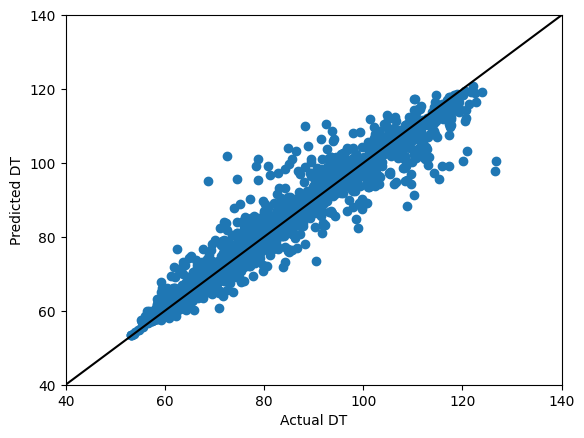

In [18]:
plt.scatter(y_val, y_pred)
plt.xlim(40, 140)
plt.ylim(40, 140)
plt.ylabel('Predicted DT')
plt.xlabel('Actual DT')
plt.plot([40,140], [40,140], 'black') #1 to 1 line

## Test Well Prediction
Once the model has been fine tuned, we can apply it to our blind test well and see how it performs.

In [19]:
test_well_x = test_df[['RHOB', 'GR', 'NPHI', 'PEF']]

In [20]:
test_df['TEST_DT'] = regr.predict(test_well_x)

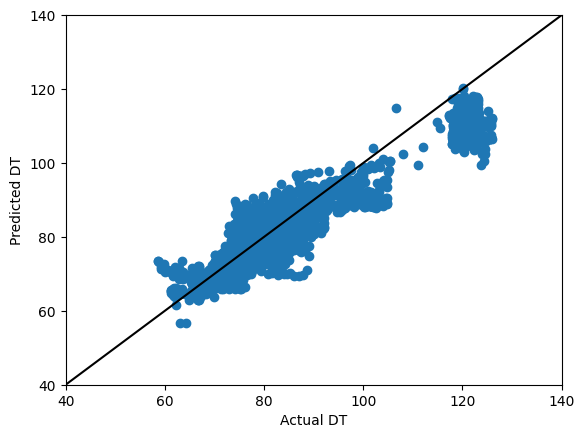

In [21]:
plt.scatter(test_df['DT'], test_df['TEST_DT'])
plt.xlim(40, 140)
plt.ylim(40, 140)
plt.ylabel('Predicted DT')
plt.xlabel('Actual DT')
plt.plot([40,140], [40,140], 'black') #1 to 1 line

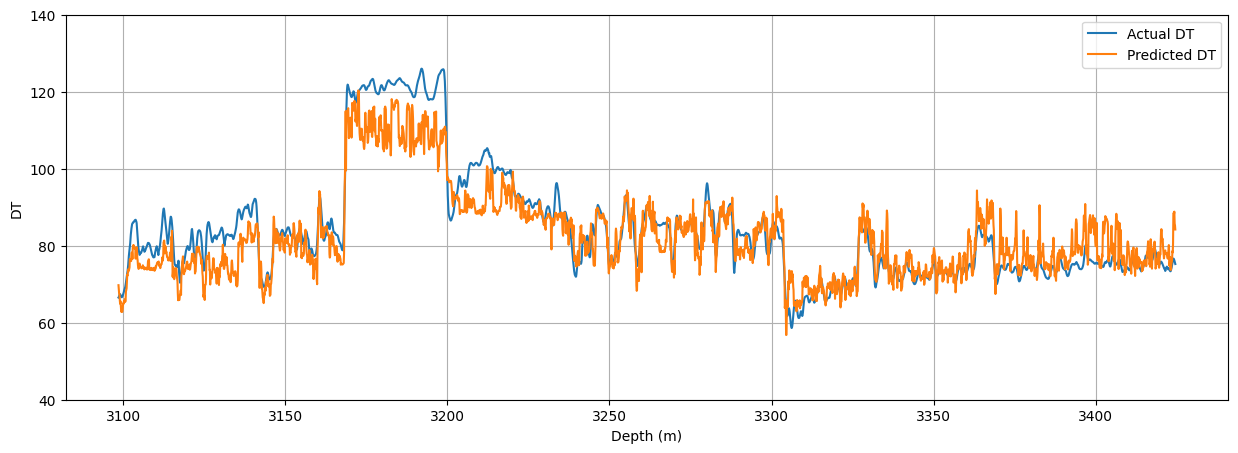

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(test_df['DEPTH'], test_df['DT'], label='Actual DT')
plt.plot(test_df['DEPTH'], test_df['TEST_DT'], label='Predicted DT')
plt.xlabel('Depth (m)')
plt.ylabel('DT')
plt.ylim(40, 140)
plt.legend()
plt.grid()

Credits: https://github.com/andymcdgeo/Petrophysics-Python-Series/tree/master